In [1]:
%config Completer.use_jedi = False

## Import Modules

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

## Prepare Dataset

In [3]:
(train_X, train_y), (testData, testLabels) = cifar10.load_data()

In [4]:
print("Train Data shape : ", train_X.shape)
print("Train Labels shape : ", train_y.shape)
print("Test Data shape : ", testData.shape)
print("Test Labels shape : ", testLabels.shape)

Train Data shape :  (50000, 32, 32, 3)
Train Labels shape :  (50000, 1)
Test Data shape :  (10000, 32, 32, 3)
Test Labels shape :  (10000, 1)


In [5]:
trainData, valData, trainLabels, valLabels = train_test_split(train_X, train_y, test_size=0.10, random_state=42)

In [6]:
# reshape image dimensions
trainData = trainData.reshape(trainData.shape[0], 32, 32, 1)
valData = valData.reshape(valData.shape[0], 32, 32, 1)
testData = testData.reshape(testData.shape[0], 32, 32, 1)

ValueError: cannot reshape array of size 138240000 into shape (45000,32,32,1)

In [7]:
print("Train Data shape : ", trainData.shape)
print("Validation Data shape : ", valData.shape)
print("Test Data shape : ", testData.shape)

Train Data shape :  (45000, 32, 32, 3)
Validation Data shape :  (5000, 32, 32, 3)
Test Data shape :  (10000, 32, 32, 3)


In [9]:
# Normalization
trainData = tf.keras.utils.normalize(trainData, axis=1)
valData = tf.keras.utils.normalize(valData, axis=1)
testData = tf.keras.utils.normalize(testData, axis=1)

## Create Model

In [10]:
trainData[0].shape

(28, 28, 1)

In [11]:
# Le-net 5 model building
leNet_model = Sequential()
leNet_model.add(Conv2D(filters=6, kernel_size=5, strides=1, activation='tanh', input_shape=trainData[0].shape, padding='valid'))
leNet_model.add(AveragePooling2D())
leNet_model.add(Conv2D(filters=16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
leNet_model.add(AveragePooling2D())
leNet_model.add(Flatten())
leNet_model.add(Dense(120, activation='tanh'))
leNet_model.add(Dense(84, activation='tanh'))
leNet_model.add(Dense(10, activation='softmax'))

In [12]:
leNet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## Compile Model

In [12]:
leNet_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

## Train LeNet Model

In [13]:
EPOCHS = 10

In [14]:
history = leNet_model.fit(trainData, trainLabels, epochs=EPOCHS, validation_data=(valData, valLabels))

Epoch 1/10
1688/1688 [==============================] - 28s 9ms/step - loss: 0.2840 - accuracy: 0.9155 - val_loss: 0.1467 - val_accuracy: 0.9573
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.1164 - accuracy: 0.9636 - val_loss: 0.0954 - val_accuracy: 0.9682
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0798 - accuracy: 0.9756 - val_loss: 0.0973 - val_accuracy: 0.9692
Epoch 4/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0627 - accuracy: 0.9807 - val_loss: 0.0718 - val_accuracy: 0.9793
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0497 - accuracy: 0.9845 - val_loss: 0.0641 - val_accuracy: 0.9792
Epoch 6/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0667 - val_accuracy: 0.9798
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0353 - accuracy: 0.9883 - val_loss: 0.0649 - val_ac

## Visualize Training Results


In [20]:
acc = history.history['accuracy']
loss=history.history['loss']

Text(0.5, 1.0, 'Training Accuracy and Loss')

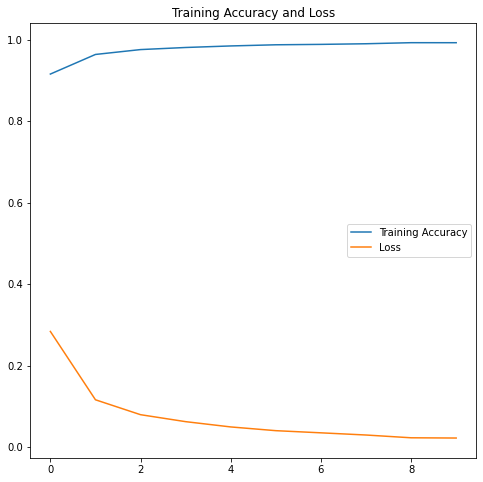

In [22]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, loss, label='Loss')
plt.legend(loc='center right')
plt.title('Training Accuracy and Loss')

In [48]:
# predictions = leNet_model.predict(testData)
image = (testData[5]).reshape(1,28,28,1)
predictions = np.argmax(leNet_model.predict(image), axis=-1)

In [49]:
predictions

array([4], dtype=int64)

In [26]:
score = leNet_model.evaluate(testData, testLabels)

313/313 [==============================] - 2s 7ms/step - loss: 0.0575 - accuracy: 0.9824


In [19]:
print('Test loss: {:.3f} %'.format(score[0] * 100))
print('Test accuracy: {:.3f} %'.format(score[1] * 100))

Test loss: 7.313 %
Test accuracy: 98.200 %


## Test on Images

Prediction of model: 4


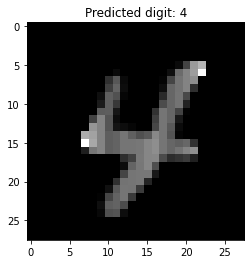

In [45]:
image = (testData[5]).reshape(1,28,28,1)
model_pred = np.argmax(leNet_model.predict(image), axis=-1)
print('Prediction of model: {}'.format(model_pred[0]))
plt.title("Predicted digit: {}".format(model_pred[0]))
plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))

Prediction of model: 1


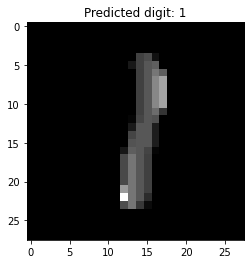

In [44]:
image = (testData[50]).reshape(1,28,28,1)
model_pred = np.argmax(leNet_model.predict(image), axis=-1)
print('Prediction of model: {}'.format(model_pred[0]))
plt.title("Predicted digit: {}".format(model_pred[0]))
plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))

Test images array shape: (4, 28, 28)
Predicted digit: 2
Predicted digit: 1
Predicted digit: 0
Predicted digit: 4


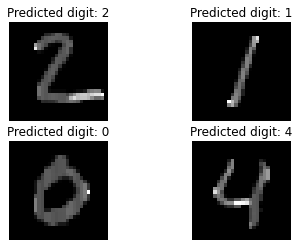

In [47]:
images = testData[1:5]
images = images.reshape(images.shape[0], 28, 28)
print ("Test images array shape: {}".format(images.shape))


for i, test_image in enumerate(images, start=1):

    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    img_prediction = np.argmax(leNet_model.predict(test_image), axis=-1)

    print ("Predicted digit: {}".format(img_prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(img_prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()

## Save h5 model file

In [50]:
leNet_model.save('LeNet5_model.h5')

## Load h5 saved model file

In [51]:
loaded_leNet_model = keras.models.load_model('LeNet5_model.h5')

Prediction of model: 7


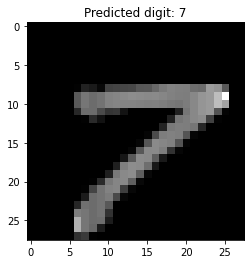

In [53]:
image = (testData[400]).reshape(1,28,28,1)
model_pred = np.argmax(leNet_model.predict(image), axis=-1)
print('Prediction of model: {}'.format(model_pred[0]))
plt.title("Predicted digit: {}".format(model_pred[0]))
plt.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))